In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets.samples_generator import make_blobs
# 生成数据
centers = [[-2, 2], [2, 2], [0, 4]]
X, y = make_blobs(n_samples=60, centers=centers, random_state=0, cluster_std=0.60)

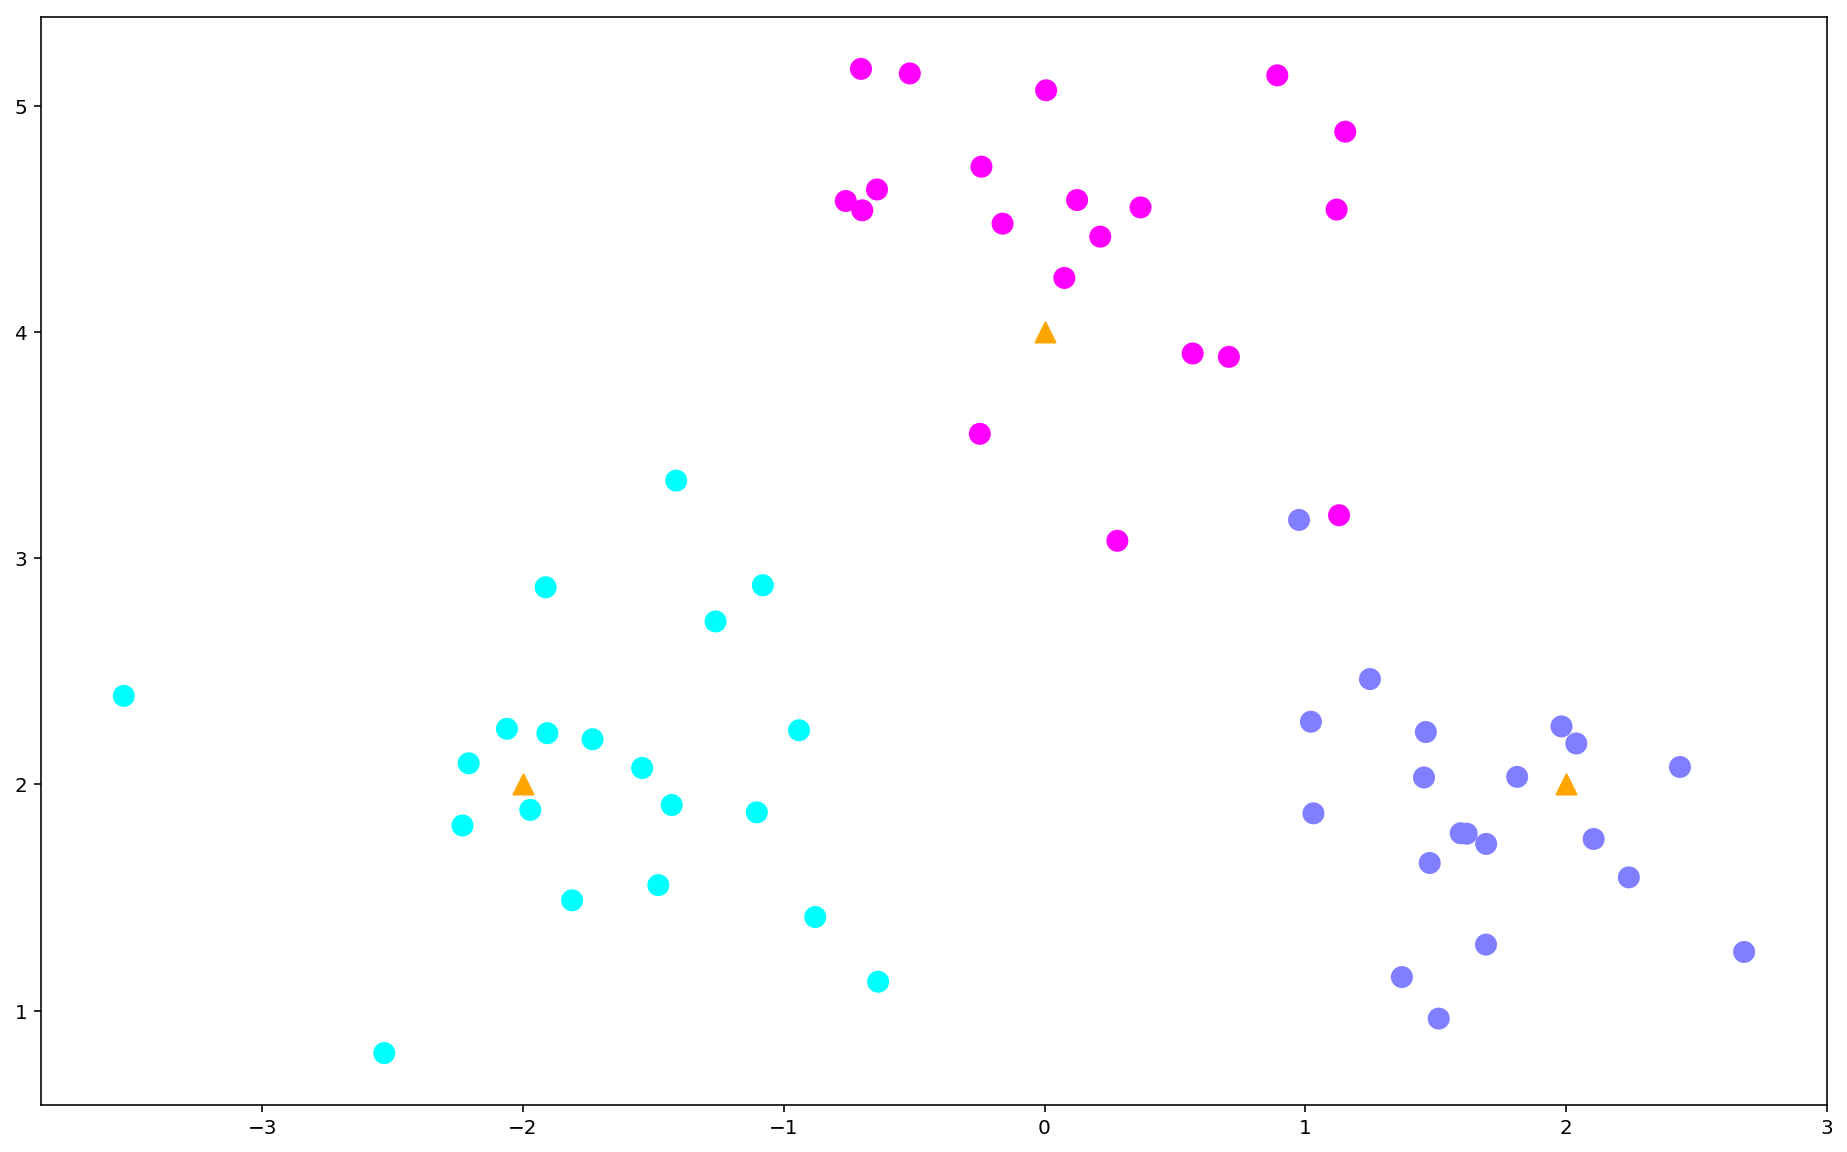

In [3]:
# 画出数据
plt.figure(figsize=(16, 10))
c = np.array(centers)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='cool');         # 画出样本
plt.scatter(c[:, 0], c[:, 1], s=100, marker='^', c='orange');   # 画出中心点

In [4]:
from sklearn.neighbors import KNeighborsClassifier
# 模型训练
k = 5
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X, y);

In [5]:
# 进行预测
X_sample = [0, 2]
X_sample = np.array(X_sample).reshape(1, -1)
y_sample = clf.predict(X_sample);
neighbors = clf.kneighbors(X_sample, return_distance=False);

<Figure size 1152x720 with 0 Axes>

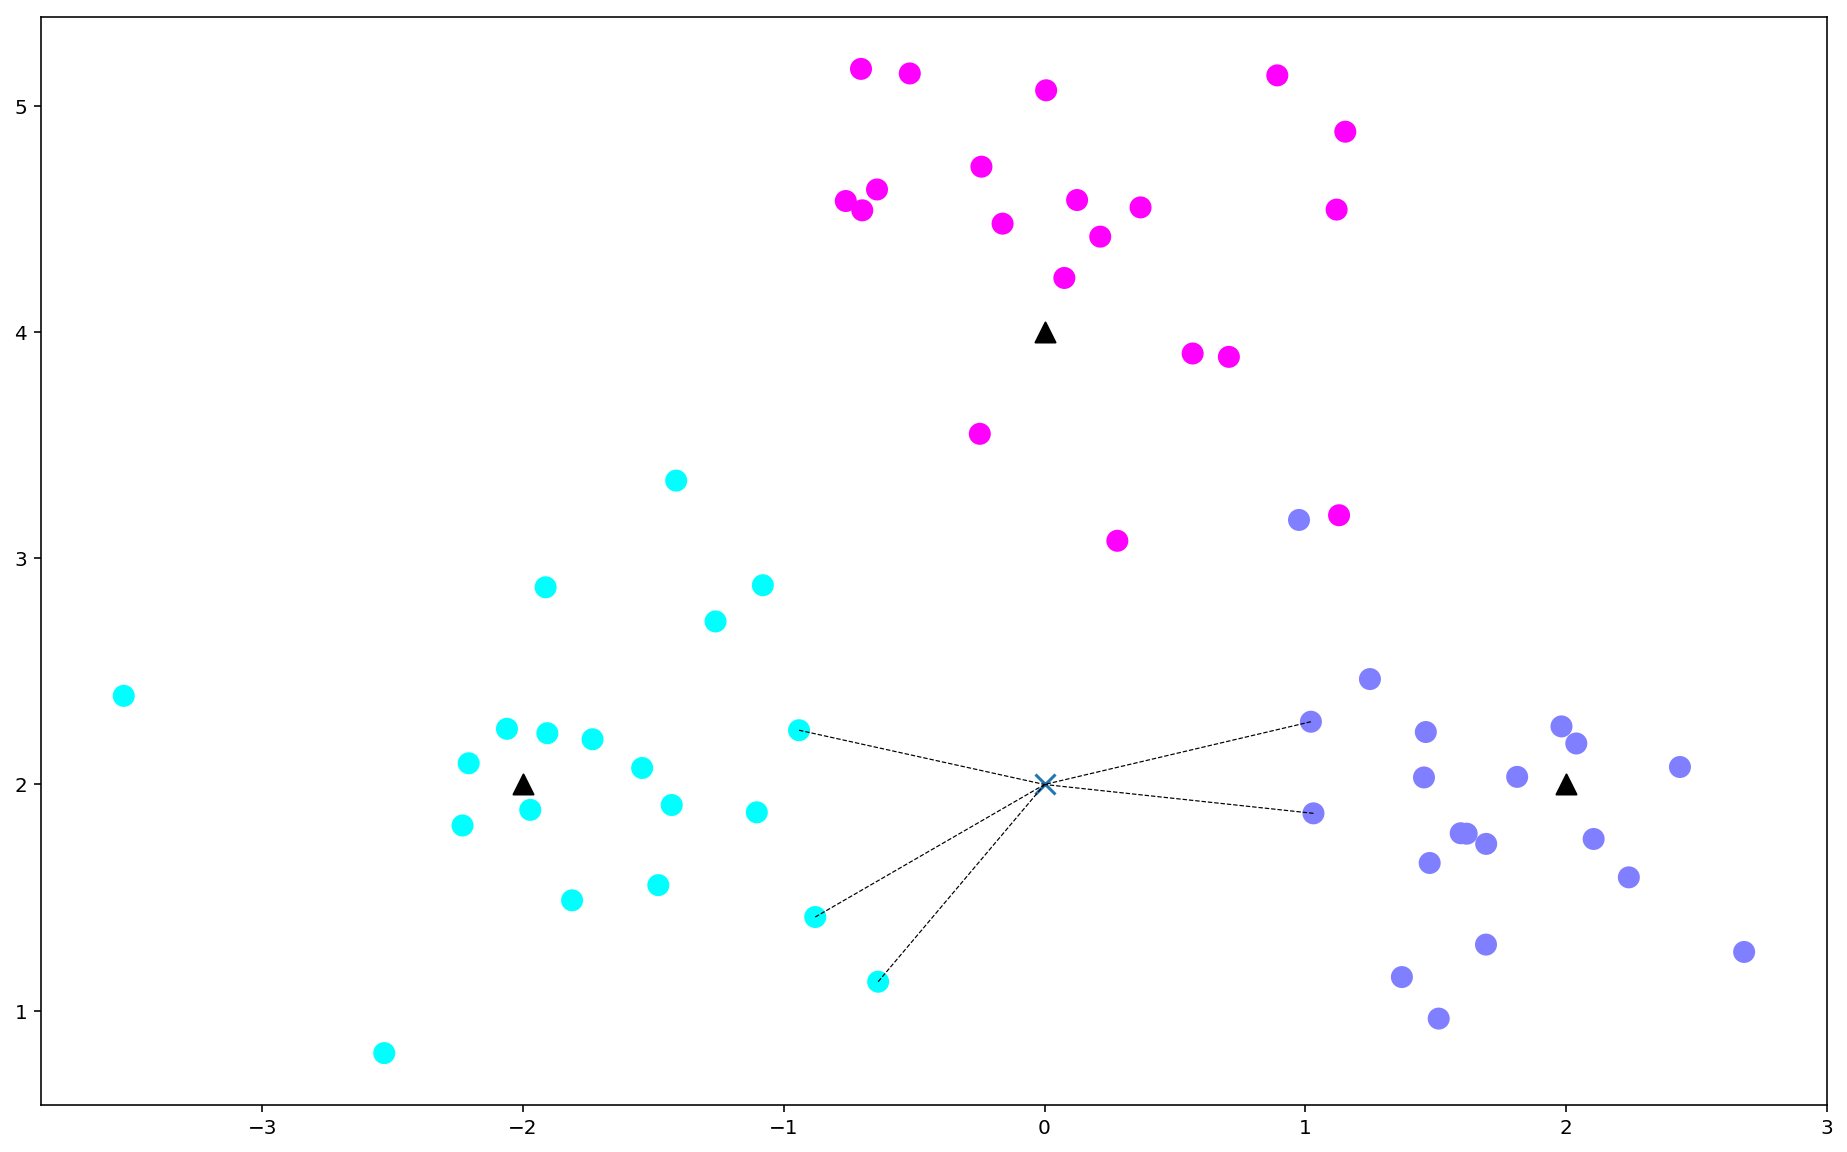

In [6]:
# 画出示意图
plt.figure(figsize=(16, 10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='cool')    # 样本
plt.scatter(c[:, 0], c[:, 1], s=100, marker='^', c='k')   # 中心点
plt.scatter(X_sample[0][0], X_sample[0][1], marker="x", 
            s=100, cmap='cool')    # 待预测的点

for i in neighbors[0]:
    # 预测点与距离最近的 5 个样本的连线
    plt.plot([X[i][0], X_sample[0][0]], [X[i][1], X_sample[0][1]], 
             'k--', linewidth=0.6);